In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [37]:
def get_df_numerical(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics)



def plot_correlation_map( df , title ,annot=True):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = annot, 
        annot_kws = { 'fontsize' : 12 }
    )
    
    plt.title(title, fontsize=24)



# Load the data

In [44]:
data = pd.read_pickle("../data/final_sets/model/2016")

In [45]:
data.head()

,ID,gender,entered,efficiency,eig_central,in_degree,k_core,out_degree,views,age,is_alive,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num,year_interval
0,144,male,2007,0.760000,0.000046,2,4,3,916.0,0,no,-1,27,-28,1,0,1,2
1,183,male,2005,0.899654,0.000801,9,10,8,4100.0,70,yes,70,-1,71,1,1,1,1
2,246,male,2013,0.734694,0.000040,2,7,5,1651.0,62,no,78,16,62,1,1,1,3
3,248,male,2007,1.000000,0.000007,2,5,4,6671.0,88,yes,88,-1,89,0,0,1,2
4,259,male,2007,0.814815,0.000068,4,4,5,7825.0,84,no,109,25,84,1,1,1,2


# Filter for columns with numerical values

In [23]:
data = get_df_numerical(data)

In [24]:
data.head()

,entered,efficiency,eig_central,id,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
0,2007,0.760000,0.000046,144,2,4,3,916.0,0,-1,27,-28,1,0,1
1,2005,0.899654,0.000801,183,9,10,8,4100.0,70,70,-1,71,1,1,1
2,2013,0.734694,0.000040,246,2,7,5,1651.0,62,78,16,62,1,1,1
3,2007,1.000000,0.000007,248,2,5,4,6671.0,88,88,-1,89,0,0,1
4,2007,0.814815,0.000068,259,4,4,5,7825.0,84,109,25,84,1,1,1


# Correlations

In [25]:
data.corr()

,entered,efficiency,eig_central,id,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
entered,1.000000,0.117528,-0.168066,0.000582,-0.275806,-0.460971,-0.374662,-0.077665,-0.224056,-0.196538,-0.091967,-0.114298,-0.108699,-0.125448,-0.038292
efficiency,0.117528,1.000000,0.003332,0.002811,0.003857,-0.216727,-0.143186,0.012421,0.009594,0.011400,-0.008514,0.021975,-0.061847,-0.036488,-0.012845
eig_central,-0.168066,0.003332,1.000000,0.003377,0.787042,0.432957,0.425349,0.462168,0.066610,0.041443,0.006887,0.037958,0.064805,0.089499,0.037977
id,0.000582,0.002811,0.003377,1.000000,0.005510,0.002128,0.001741,0.001072,-0.002850,0.001844,0.004065,-0.002475,0.004441,0.001798,-0.000295
in_degree,-0.275806,0.003857,0.787042,0.005510,1.000000,0.649606,0.629804,0.408874,0.103899,0.094513,0.059184,0.038390,0.071616,0.160514,0.037017
k_core,-0.460971,-0.216727,0.432957,0.002128,0.649606,1.000000,0.914934,0.197929,0.175157,0.128190,0.082447,0.049659,0.105564,0.275007,0.049219
out_degree,-0.374662,-0.143186,0.425349,0.001741,0.629804,0.914934,1.000000,0.191313,0.150050,0.108806,0.062843,0.050058,0.106523,0.252414,0.061245
views,-0.077665,0.012421,0.462168,0.001072,0.408874,0.197929,0.191313,1.000000,0.023978,0.015877,0.006546,0.010212,0.029451,0.050169,0.040181
age,-0.224056,0.009594,0.066610,-0.002850,0.103899,0.175157,0.150050,0.023978,1.000000,0.611529,0.072539,0.592345,0.100668,0.205713,0.092087
distance_birth,-0.196538,0.011400,0.041443,0.001844,0.094513,0.128190,0.108806,0.015877,0.611529,1.000000,0.589847,0.446463,0.065240,0.016493,0.086732


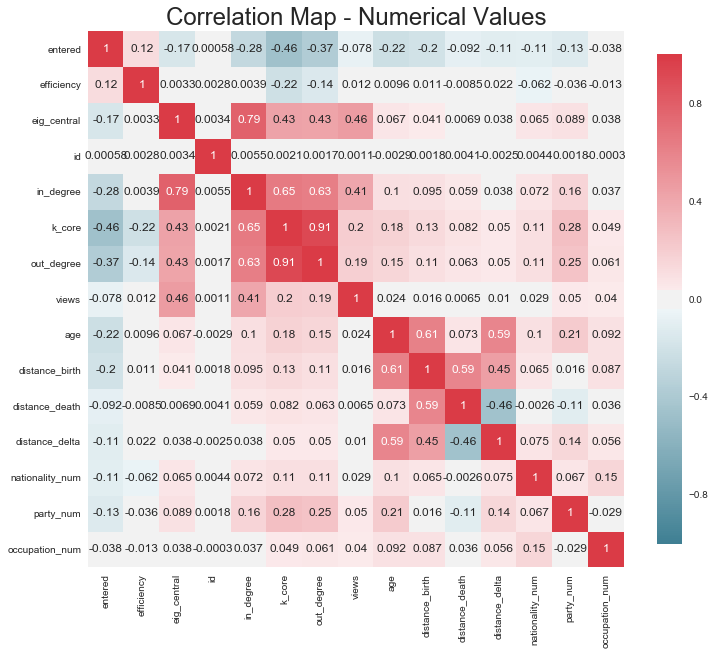

In [38]:
plot_correlation_map(data,"Correlation Map - Numerical Values")

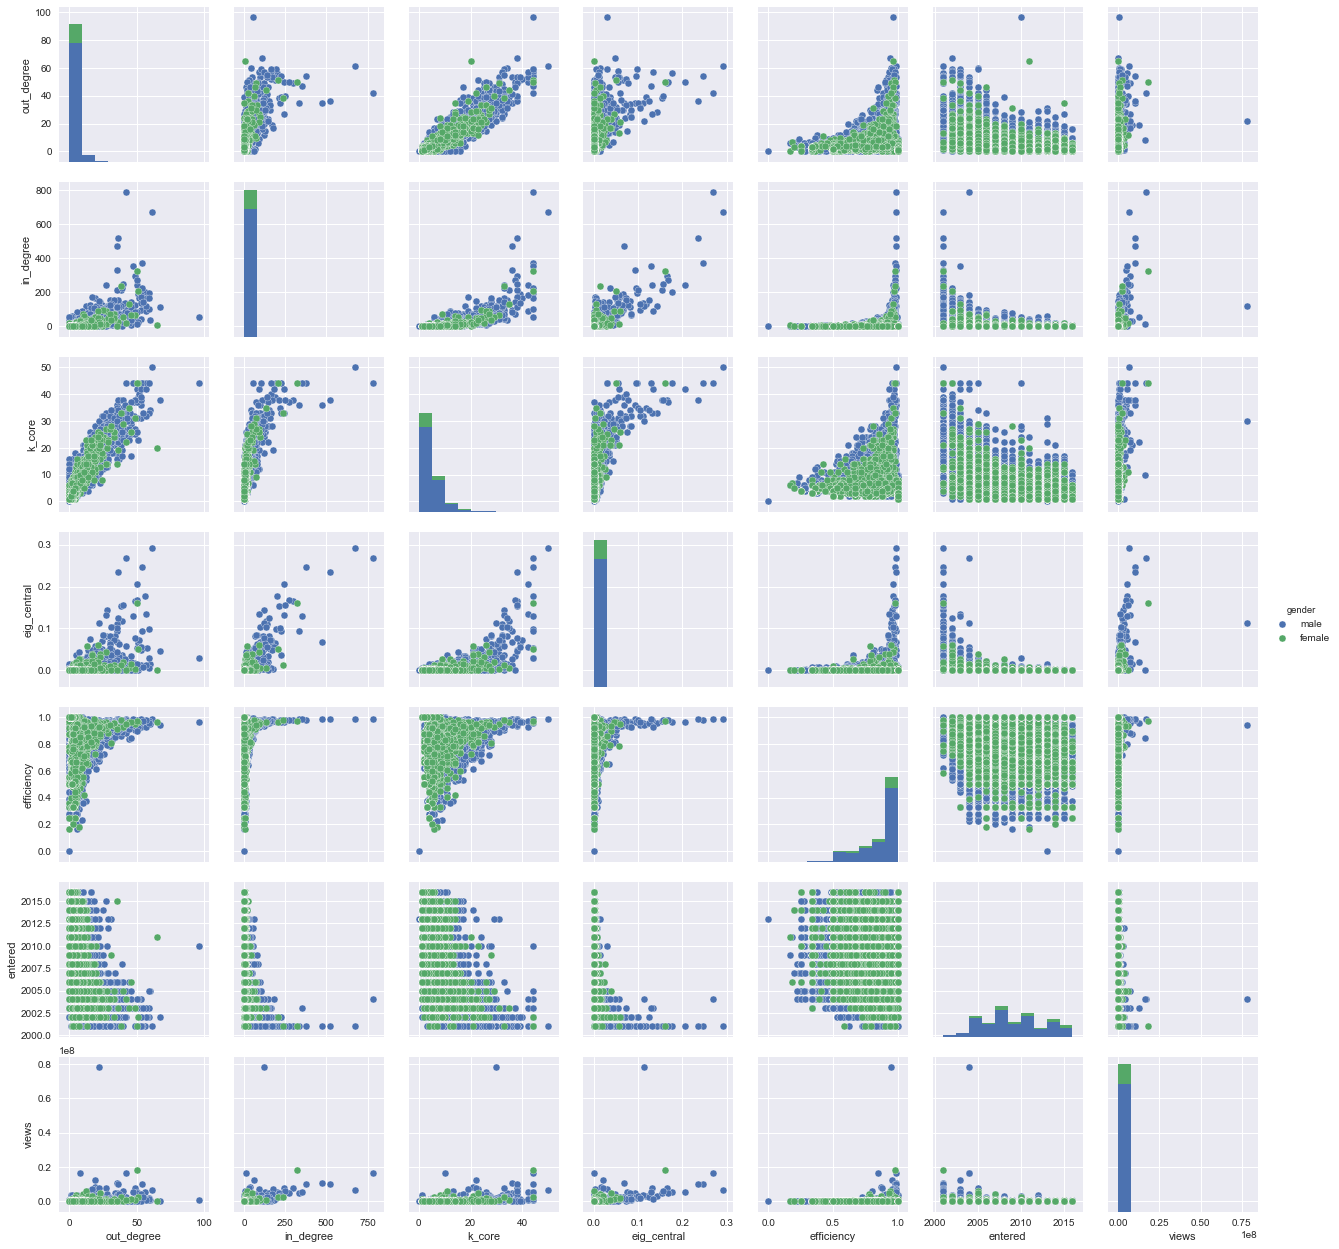

In [49]:
sns.pairplot(data[["out_degree", "in_degree", "k_core","eig_central","efficiency","entered", "views", "gender"]],hue="gender")

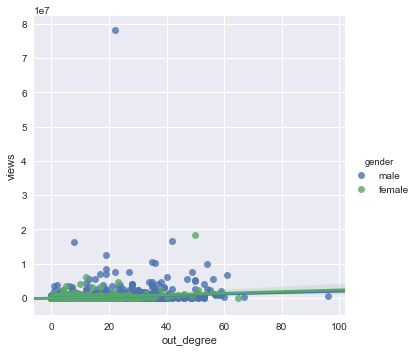

In [52]:
sns.lmplot("out_degree", "views", data, hue="gender")

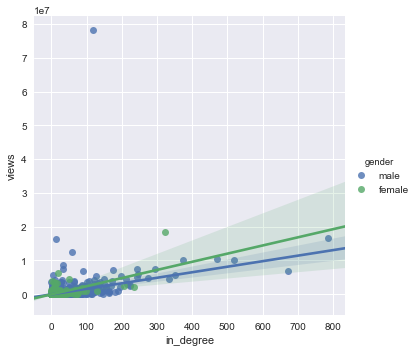

In [53]:
sns.lmplot("in_degree", "views", data, hue="gender")

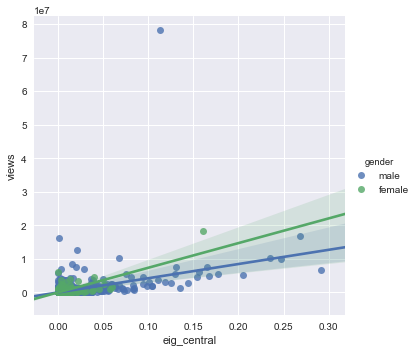

In [55]:
sns.lmplot("eig_central", "views", data, hue="gender")

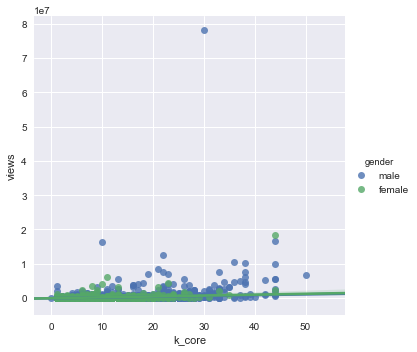

In [56]:
sns.lmplot("k_core", "views", data, hue="gender")

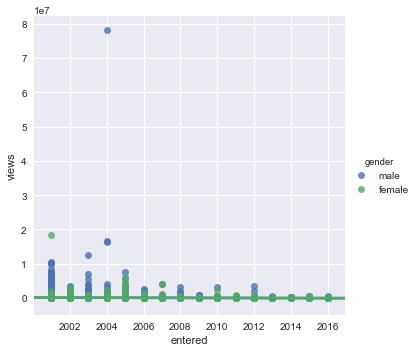

In [57]:
sns.lmplot("entered", "views", data, hue="gender")

# Univariate Analysis

In [43]:
data.describe()

,entered,efficiency,eig_central,id,in_degree,k_core,out_degree,views,age,distance_birth,distance_death,distance_delta,nationality_num,party_num,occupation_num
count,45286.000000,45286.000000,4.528600e+04,4.528600e+04,45286.000000,45286.000000,45286.00000,4.528600e+04,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000,45286.000000
mean,2009.092898,0.874764,5.086958e-04,5.819639e+05,3.435830,4.360133,3.43583,2.768659e+04,49.008943,71.726737,25.132337,46.594400,0.699819,0.641942,1.415051
std,3.558152,0.161999,4.671573e-03,3.362075e+05,10.989717,4.185327,4.52381,4.443851e+05,32.032869,68.501291,69.001023,62.270007,0.569811,0.725338,0.947824
min,2001.000000,0.000000,-1.779204e-18,6.500000e+01,0.000000,0.000000,0.00000,3.040000e+02,-1.000000,-1.000000,-1.000000,-1398.000000,0.000000,0.000000,1.000000
25%,2006.000000,0.777778,6.798322e-20,2.910438e+05,1.000000,2.000000,1.00000,1.437000e+03,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,2009.000000,0.953125,3.443267e-08,5.806355e+05,1.000000,3.000000,2.00000,2.846000e+03,60.000000,66.000000,-1.000000,62.000000,1.000000,1.000000,1.000000
75%,2012.000000,1.000000,3.327005e-05,8.722920e+05,3.000000,6.000000,4.00000,7.567750e+03,73.000000,98.000000,24.000000,75.000000,1.000000,1.000000,1.000000
max,2016.000000,1.000000,2.914469e-01,1.167233e+06,785.000000,55.000000,96.00000,7.823741e+07,109.000000,1477.000000,1414.000000,1060.000000,6.000000,8.000000,23.000000


In [62]:
# sns.boxplot("in_degree", data)

In [ ]:
# notebook with network, show if it is connected